# Hamming Distance

The Hamming distance is a metric for comparing two strings or sequences of equal length. It measures the minimum number of substitutions required to change one string into the other. In other words, it counts the number of positions at which the corresponding symbols differ between the two strings.


## Definition and Concept

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. It is named after Richard Hamming, who introduced the concept in his work on error-detecting and error-correcting codes.

For two strings a and b of equal length, the Hamming distance d(a,b) is defined as:

$$d(a,b) = \sum_{i=1}^{n} \delta(a_i, b_i)$$

Where:
- n is the length of the strings
- δ(a_i, b_i) is 0 if a_i = b_i, and 1 otherwise

For example, the Hamming distance between "karolin" and "kathrin" is 3, as they differ at positions 2, 3, and 5:
- k**a**rolin
- k**a**thrin

### Mathematical Properties

The Hamming distance satisfies the properties of a metric:
1. **Non-negativity**: d(a,b) ≥ 0
2. **Identity of indiscernibles**: d(a,b) = 0 if and only if a = b
3. **Symmetry**: d(a,b) = d(b,a)
4. **Triangle inequality**: d(a,c) ≤ d(a,b) + d(b,c)


In [1]:
# Basic implementation of Hamming distance
def hamming_distance(str1, str2):
    """
    Calculate the Hamming distance between two strings.

    Parameters:
    -----------
    str1, str2 : str
        The strings to compare (must be of equal length)

    Returns:
    --------
    int
        The Hamming distance

    Raises:
    -------
    ValueError
        If the strings have different lengths
    """
    if len(str1) != len(str2):
        raise ValueError("Strings must be of equal length")

    # Count the number of positions where characters differ
    return sum(c1 != c2 for c1, c2 in zip(str1, str2))

# Example usage
examples = [
    ("karolin", "kathrin"),
    ("1011101", "1001001"),
    ("ATGCATGC", "ATGGATGC"),
    ("hello", "hello")
]

for str1, str2 in examples:
    try:
        distance = hamming_distance(str1, str2)
        print(f"Hamming distance between '{str1}' and '{str2}': {distance}")
    except ValueError as e:
        print(f"Error comparing '{str1}' and '{str2}': {e}")


Hamming distance between 'karolin' and 'kathrin': 3
Hamming distance between '1011101' and '1001001': 2
Hamming distance between 'ATGCATGC' and 'ATGGATGC': 1
Hamming distance between 'hello' and 'hello': 0


## Bit-Level Implementation

For binary strings or bit vectors, we can use bitwise operations to calculate the Hamming distance more efficiently:


In [2]:
# Bit-level implementation for binary strings
def hamming_distance_binary(bin1, bin2):
    """
    Calculate the Hamming distance between two binary strings using bitwise operations.

    Parameters:
    -----------
    bin1, bin2 : str
        Binary strings (containing only '0's and '1's) of equal length

    Returns:
    --------
    int
        The Hamming distance
    """
    if len(bin1) != len(bin2):
        raise ValueError("Binary strings must be of equal length")

    # Convert to integers
    int1 = int(bin1, 2)
    int2 = int(bin2, 2)

    # XOR will set bits to 1 where they differ
    xor_result = int1 ^ int2

    # Count the number of 1s in the XOR result
    return bin(xor_result).count('1')

# For integers directly
def hamming_distance_int(x, y):
    """
    Calculate the Hamming distance between the binary representations of two integers.

    Parameters:
    -----------
    x, y : int
        The integers to compare

    Returns:
    --------
    int
        The Hamming distance
    """
    # XOR the integers and count the number of 1s in the result
    return bin(x ^ y).count('1')

# Example usage
binary_examples = [
    ("1011101", "1001001"),
    ("0000000", "1111111"),
    ("10101010", "01010101")
]

for bin1, bin2 in binary_examples:
    try:
        distance = hamming_distance_binary(bin1, bin2)
        print(f"Hamming distance between binary '{bin1}' and '{bin2}': {distance}")
    except ValueError as e:
        print(f"Error comparing '{bin1}' and '{bin2}': {e}")

# Integer examples
int_examples = [
    (25, 30),    # 11001 vs 11110
    (8, 15),     # 1000 vs 1111
    (123, 456)   # 1111011 vs 111001000
]

for x, y in int_examples:
    distance = hamming_distance_int(x, y)
    print(f"Hamming distance between {x} ({bin(x)[2:]}) and {y} ({bin(y)[2:]}): {distance}")


Hamming distance between binary '1011101' and '1001001': 2
Hamming distance between binary '0000000' and '1111111': 7
Hamming distance between binary '10101010' and '01010101': 8
Hamming distance between 25 (11001) and 30 (11110): 3
Hamming distance between 8 (1000) and 15 (1111): 3
Hamming distance between 123 (1111011) and 456 (111001000): 6


## Handling Strings of Different Lengths

The standard Hamming distance is only defined for strings of equal length. However, we can extend it to handle strings of different lengths in several ways:


In [3]:
# Extended Hamming distance for strings of different lengths
def extended_hamming_distance(str1, str2):
    """
    Calculate an extended version of Hamming distance for strings of different lengths.

    This implementation considers the minimum possible Hamming distance by:
    1. Calculating the standard Hamming distance for the overlapping part
    2. Adding the difference in lengths (which represents the minimum number of insertions/deletions)

    Parameters:
    -----------
    str1, str2 : str
        The strings to compare (can be of different lengths)

    Returns:
    --------
    int
        The extended Hamming distance
    """
    # Calculate the standard Hamming distance for the overlapping part
    min_length = min(len(str1), len(str2))
    standard_distance = sum(c1 != c2 for c1, c2 in zip(str1[:min_length], str2[:min_length]))

    # Add the difference in lengths
    length_difference = abs(len(str1) - len(str2))

    return standard_distance + length_difference

# Example usage
different_length_examples = [
    ("hamming", "ham"),
    ("distance", "distant"),
    ("algorithm", "logarithm"),
    ("short", "very long string")
]

for str1, str2 in different_length_examples:
    distance = extended_hamming_distance(str1, str2)
    print(f"Extended Hamming distance between '{str1}' and '{str2}': {distance}")


Extended Hamming distance between 'hamming' and 'ham': 4
Extended Hamming distance between 'distance' and 'distant': 2
Extended Hamming distance between 'algorithm' and 'logarithm': 3
Extended Hamming distance between 'short' and 'very long string': 16


## Normalized Hamming Distance

For comparing strings of equal length but different sizes, it's often useful to normalize the Hamming distance to a value between 0 and 1:


In [4]:
def normalized_hamming_distance(str1, str2):
    """
    Calculate the normalized Hamming distance between two strings.

    Parameters:
    -----------
    str1, str2 : str
        The strings to compare (must be of equal length)

    Returns:
    --------
    float
        The normalized Hamming distance (between 0 and 1)
    """
    if len(str1) != len(str2):
        raise ValueError("Strings must be of equal length")

    if len(str1) == 0:
        return 0.0  # Both strings are empty

    # Calculate the absolute Hamming distance
    distance = hamming_distance(str1, str2)

    # Normalize by the length of the strings
    return distance / len(str1)

# Example usage
for str1, str2 in examples:
    try:
        norm_distance = normalized_hamming_distance(str1, str2)
        print(f"Normalized Hamming distance between '{str1}' and '{str2}': {norm_distance:.4f}")
    except ValueError as e:
        print(f"Error comparing '{str1}' and '{str2}': {e}")


Normalized Hamming distance between 'karolin' and 'kathrin': 0.4286
Normalized Hamming distance between '1011101' and '1001001': 0.2857
Normalized Hamming distance between 'ATGCATGC' and 'ATGGATGC': 0.1250
Normalized Hamming distance between 'hello' and 'hello': 0.0000


## Hamming Similarity

While Hamming distance measures the difference between strings, we can convert it to a similarity measure (where higher values indicate greater similarity):


In [5]:
def hamming_similarity(str1, str2):
    """
    Calculate the Hamming similarity between two strings.

    Parameters:
    -----------
    str1, str2 : str
        The strings to compare (must be of equal length)

    Returns:
    --------
    float
        The Hamming similarity (between 0 and 1)
    """
    try:
        # Calculate the normalized distance
        distance = normalized_hamming_distance(str1, str2)

        # Convert to similarity (1 - distance)
        return 1.0 - distance
    except ValueError:
        # For strings of different lengths, return 0 (no similarity)
        return 0.0

# Example usage
for str1, str2 in examples:
    similarity = hamming_similarity(str1, str2)
    print(f"Hamming similarity between '{str1}' and '{str2}': {similarity:.4f}")


Hamming similarity between 'karolin' and 'kathrin': 0.5714
Hamming similarity between '1011101' and '1001001': 0.7143
Hamming similarity between 'ATGCATGC' and 'ATGGATGC': 0.8750
Hamming similarity between 'hello' and 'hello': 1.0000


## Visualizing Hamming Distance

Let's visualize the Hamming distance between two strings:


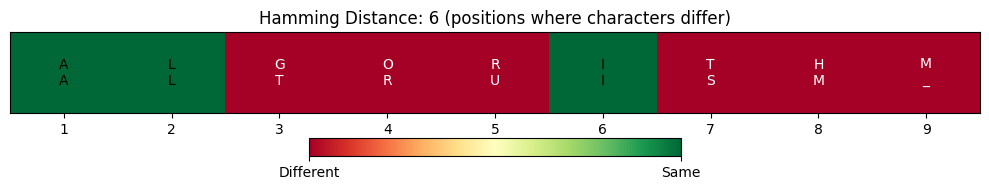

In [6]:
import matplotlib.pyplot as plt
import numpy as np

def visualize_hamming_distance(str1, str2):
    """
    Visualize the Hamming distance between two strings.

    Parameters:
    -----------
    str1, str2 : str
        The strings to compare (must be of equal length)
    """
    if len(str1) != len(str2):
        raise ValueError("Strings must be of equal length")

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 2))

    # Create a matrix to represent matches and mismatches
    comparison = [c1 == c2 for c1, c2 in zip(str1, str2)]

    # Plot the comparison
    cmap = plt.cm.RdYlGn  # Red for mismatches, green for matches
    im = ax.imshow([comparison], cmap=cmap, aspect='auto', vmin=0, vmax=1)

    # Add text annotations
    for i in range(len(str1)):
        color = 'black' if comparison[i] else 'white'
        ax.text(i, 0, f"{str1[i]}\n{str2[i]}", ha="center", va="center", color=color)

    # Set ticks and labels
    ax.set_xticks(range(len(str1)))
    ax.set_xticklabels(range(1, len(str1) + 1))
    ax.set_yticks([])

    # Add a title
    distance = sum(not x for x in comparison)
    ax.set_title(f"Hamming Distance: {distance} (positions where characters differ)")

    # Add a colorbar
    cbar = plt.colorbar(im, ax=ax, orientation='horizontal', pad=0.2, ticks=[0, 1])
    cbar.set_ticklabels(['Different', 'Same'])

    plt.tight_layout()
    plt.show()

# Example visualization
str1 = "ALGORITHM"
str2 = "ALTRUISM_"
try:
    visualize_hamming_distance(str1, str2)
except ValueError as e:
    print(f"Error: {e}")


## Applications of Hamming Distance

Hamming distance has numerous applications across various domains:

### 1. Error Detection and Correction

One of the original applications of Hamming distance is in error detection and correction codes:


In [7]:
def can_detect_errors(hamming_distance):
    """Determine how many errors can be detected with a given Hamming distance."""
    return hamming_distance - 1

def can_correct_errors(hamming_distance):
    """Determine how many errors can be corrected with a given Hamming distance."""
    return (hamming_distance - 1) // 2

# Example: Error detection and correction capabilities
code_distances = [3, 5, 7, 9]

print("Error Detection and Correction Capabilities:")
print("Hamming Distance | Errors Detectable | Errors Correctable")
print("----------------|-------------------|-------------------")
for distance in code_distances:
    detect = can_detect_errors(distance)
    correct = can_correct_errors(distance)
    print(f"{distance:16} | {detect:17} | {correct:19}")


Error Detection and Correction Capabilities:
Hamming Distance | Errors Detectable | Errors Correctable
----------------|-------------------|-------------------
               3 |                 2 |                   1
               5 |                 4 |                   2
               7 |                 6 |                   3
               9 |                 8 |                   4


### 2. Information Retrieval

Hamming distance is used in information retrieval to find similar documents or records:


In [8]:
def find_similar_documents(query, documents, threshold=0.7):
    """
    Find documents similar to the query based on Hamming similarity.

    Parameters:
    -----------
    query : str
        The query document
    documents : list
        List of documents to search through
    threshold : float
        Minimum similarity threshold (0-1)

    Returns:
    --------
    list
        Matching documents sorted by similarity
    """
    results = []

    # Convert documents to equal length by padding or truncating
    max_len = max(len(query), max(len(doc) for doc in documents))
    padded_query = query.ljust(max_len)

    for doc in documents:
        padded_doc = doc.ljust(max_len)
        # Calculate similarity for the equal-length parts
        min_len = min(len(query), len(doc))
        similarity = hamming_similarity(query[:min_len], doc[:min_len])

        # Adjust for length difference
        length_penalty = min_len / max_len
        adjusted_similarity = similarity * length_penalty

        if adjusted_similarity >= threshold:
            results.append((doc, adjusted_similarity))

    # Sort by similarity (descending)
    results.sort(key=lambda x: x[1], reverse=True)

    return results

# Example usage
documents = [
    "hamming distance",
    "hamming code",
    "hammering nails",
    "distance measure",
    "levenshtein distance",
    "hamming weight"
]

query = "hamming distance"
print(f"Query: '{query}'")
matches = find_similar_documents(query, documents)
for doc, similarity in matches:
    print(f"  '{doc}' (similarity: {similarity:.4f})")


Query: 'hamming distance'
  'hamming distance' (similarity: 0.8000)


### 3. Bioinformatics

In bioinformatics, Hamming distance is used to compare DNA or protein sequences:


In [9]:
def analyze_dna_mutations(seq1, seq2):
    """
    Analyze mutations between two DNA sequences using Hamming distance.

    Parameters:
    -----------
    seq1, seq2 : str
        The DNA sequences to compare (must be of equal length)

    Returns:
    --------
    dict
        Dictionary with mutation analysis
    """
    if len(seq1) != len(seq2):
        raise ValueError("Sequences must be of equal length")

    # Calculate Hamming distance
    distance = hamming_distance(seq1, seq2)

    # Identify mutation positions and types
    mutations = []
    for i, (base1, base2) in enumerate(zip(seq1, seq2)):
        if base1 != base2:
            mutations.append({
                'position': i + 1,
                'from': base1,
                'to': base2
            })

    return {
        'distance': distance,
        'mutation_rate': distance / len(seq1),
        'mutations': mutations
    }

# Example DNA sequences
dna_seq1 = "ACGTACGTACGT"
dna_seq2 = "ACGTAGTACCT"

try:
    result = analyze_dna_mutations(dna_seq1, dna_seq2)
    print(f"DNA Mutation Analysis:")
    print(f"Sequence 1: {dna_seq1}")
    print(f"Sequence 2: {dna_seq2}")
    print(f"Hamming Distance: {result['distance']}")
    print(f"Mutation Rate: {result['mutation_rate']:.4f}")
    print("Mutations:")
    for mutation in result['mutations']:
        print(f"  Position {mutation['position']}: {mutation['from']} → {mutation['to']}")
except ValueError as e:
    print(f"Error: {e}")


Error: Sequences must be of equal length


## Advantages and Limitations

### Advantages:

1. **Simplicity**: Easy to understand and implement
2. **Efficiency**: O(n) time complexity, where n is the length of the strings
3. **Metric Properties**: Satisfies all the properties of a metric space
4. **Bit-level Operations**: Can be efficiently implemented using bitwise operations for binary data

### Limitations:

1. **Equal Length Requirement**: Only defined for strings of equal length
2. **No Insertions/Deletions**: Doesn't account for insertions or deletions, only substitutions
3. **Position Sensitivity**: Doesn't handle shifts or transpositions well
4. **Binary Comparison**: Each position is either a match or mismatch, with no partial matching


## Comparison with Other String Metrics

Hamming distance is one of many string similarity metrics. Here's how it compares to some others:

### 1. Levenshtein Distance
- Allows insertions, deletions, and substitutions
- Works for strings of different lengths
- More computationally expensive (O(m×n) time complexity)
- Better for general string comparison

### 2. Jaccard Similarity
- Based on character or word sets, not sequences
- Ignores order and position
- Better for document similarity when word order is less important

### 3. Cosine Similarity
- Treats strings as vectors in high-dimensional space
- Good for document similarity with term frequency weighting
- Ignores sequence information


In [10]:
# Comparing Hamming distance with other metrics
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def compare_string_metrics(str1, str2):
    """
    Compare different string similarity metrics.

    Parameters:
    -----------
    str1, str2 : str
        The strings to compare

    Returns:
    --------
    dict
        Dictionary with different similarity metrics
    """
    # Prepare strings of equal length for Hamming
    max_len = max(len(str1), len(str2))
    padded_str1 = str1.ljust(max_len)
    padded_str2 = str2.ljust(max_len)

    # Hamming similarity
    ham_sim = hamming_similarity(padded_str1, padded_str2)

    # Jaccard similarity (character-based)
    def jaccard_similarity(s1, s2):
        set1 = set(s1.lower())
        set2 = set(s2.lower())
        intersection = len(set1.intersection(set2))
        union = len(set1.union(set2))
        return intersection / union if union > 0 else 0

    jac_sim = jaccard_similarity(str1, str2)

    # Cosine similarity
    vectorizer = CountVectorizer().fit([str1, str2])
    vectors = vectorizer.transform([str1, str2])
    cos_sim = cosine_similarity(vectors)[0, 1]

    return {
        "hamming": ham_sim,
        "jaccard": jac_sim,
        "cosine": cos_sim
    }

# Example comparisons
comparison_examples = [
    ("hamming", "hanning"),
    ("distance", "resistance"),
    ("algorithm", "logarithm"),
    ("completely different", "totally unrelated")
]

print("Comparison of String Similarity Metrics:")
for str1, str2 in comparison_examples:
    metrics = compare_string_metrics(str1, str2)
    print(f"\n'{str1}' vs '{str2}':")
    print(f"  Hamming: {metrics['hamming']:.4f}")
    print(f"  Jaccard: {metrics['jaccard']:.4f}")
    print(f"  Cosine: {metrics['cosine']:.4f}")


Comparison of String Similarity Metrics:

'hamming' vs 'hanning':
  Hamming: 0.7143
  Jaccard: 0.8333
  Cosine: 0.0000

'distance' vs 'resistance':
  Hamming: 0.1000
  Jaccard: 0.7778
  Cosine: 0.0000

'algorithm' vs 'logarithm':
  Hamming: 0.6667
  Jaccard: 1.0000
  Cosine: 0.0000

'completely different' vs 'totally unrelated':
  Hamming: 0.1500
  Jaccard: 0.5625
  Cosine: 0.0000


## Conclusion

Hamming distance is a fundamental metric for comparing strings of equal length. Its simplicity and efficiency make it particularly useful in applications where only substitutions are relevant, such as error detection and correction codes, DNA sequence analysis, and certain types of pattern matching.

Key takeaways:
1. Hamming distance counts the number of positions where two strings of equal length differ
2. It has a linear time complexity O(n) and can be efficiently implemented using bitwise operations for binary data
3. It's particularly useful in error detection/correction and signal processing
4. Its main limitation is that it only handles substitutions and requires strings of equal length
5. For more flexible string comparison, other metrics like Levenshtein distance may be more appropriate

When working with string similarity, it's important to choose the right metric for your specific application, as different metrics capture different aspects of string similarity.
